In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [294]:
iris = pd.read_csv('/content/iris.csv')

In [295]:
df= pd.DataFrame(iris)
df1 = df.copy()

In [296]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [297]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [298]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [300]:
df['target'] = df.species

In [301]:
df['features'] = df.drop('species',axis=1,inplace=True)

In [302]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [303]:
df['target_n'] = le.fit_transform(df['target'])

In [304]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,features,target_n
0,5.1,3.5,1.4,0.2,setosa,None,0
1,4.9,3.0,1.4,0.2,setosa,None,0
2,4.7,3.2,1.3,0.2,setosa,None,0
3,4.6,3.1,1.5,0.2,setosa,None,0
4,5.0,3.6,1.4,0.2,setosa,None,0


In [305]:
df.drop(['features','target'],axis=1,inplace=True)

In [306]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target_n
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [307]:
df.target_n.unique()

array([0, 1, 2])

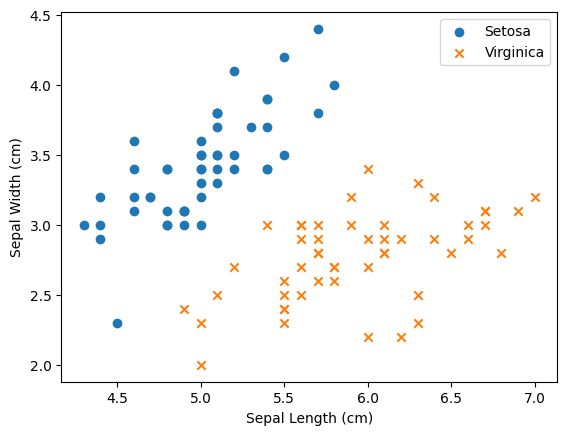

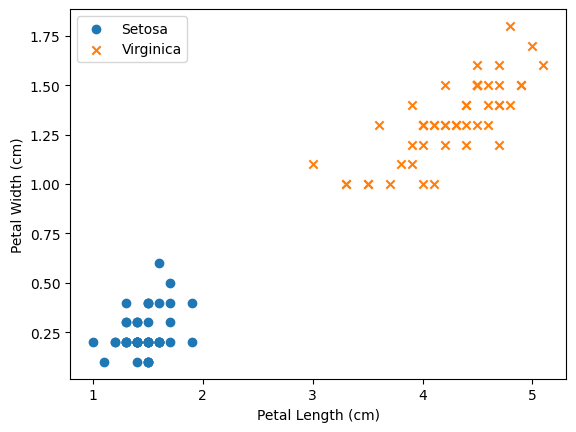

In [308]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', and 'species'

# Filter data for setosa and virginica
setosa = df[df['target_n'] ==0]
virginica = df[df['target_n'] == 1]

# Create a figure and axes
fig, ax = plt.subplots()

# Scatter plot for sepal length vs sepal width
ax.scatter(setosa['sepal_length'], setosa['sepal_width'], label='Setosa', marker='o')
ax.scatter(virginica['sepal_length'], virginica['sepal_width'], label='Virginica', marker='x')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.legend()
plt.show()


# Scatter plot for petal length vs petal width
fig, ax = plt.subplots()
ax.scatter(setosa['petal_length'], setosa['petal_width'], label='Setosa', marker='o')
ax.scatter(virginica['petal_length'], virginica['petal_width'], label='Virginica', marker='x')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.legend()
plt.show()

In [309]:
from sklearn.model_selection import train_test_split
X = df.drop('target_n',axis=1)
y = df.target_n

In [310]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(len(X_train))
print(len(X_test))

120
30


In [311]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
model.score(X_test, y_test)

1.0

In [ ]:
import numpy as np

# Define the kernel function (e.g., linear kernel)
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

# Define the decision function
def decision_function(x, weights, bias):
    return np.dot(x, weights) + bias

# Define the loss function (e.g., hinge loss)
def hinge_loss(y_true, y_pred):
    return np.maximum(0, 1 - y_true * y_pred)

# ... (Implementation of optimization algorithm and training) ...